In [18]:
import numpy
%matplotlib inline

# Modèles linéaires

Voici un ensemble de méthodes destinées à la régression dans laquelle la valeur cible est censée être une combinaison linéaire des caractéristiques. En notation mathématique, si $\tilde{y}$ est la valeur prédite:

$$\tilde{y}(\omega, x)=\omega_0+\omega_1\cdot x_1+\cdots+ \omega_n\cdot x_n$$

## Les moindres carrés ordinaires

```LinearRegression``` ajuste un modèle linéaire avec des coefficients:

$$\omega=(\omega_1, \omega_2, \cdots, \omega_n)$$

pour minimiser la somme résiduelle des carrés entre les cibles observées dans l'ensemble de données et les cibles prédites par l'approximation linéaire. La méthode des moindres carrés consiste donc à minimiser la fonction d'erreur :

$$E(\omega)=\Vert X\cdot\omega - y \Vert_2^2$$

La classe ```LinearRegression``` prendra dans sa méthode d'ajustement des tableaux ```X```, ```y``` et stockera les coefficients $\omega$ du modèle linéaire dans son membre ```coef_``` :

Les estimations des coefficients pour les moindres carrés ordinaires reposent sur l'indépendance des caractéristiques. Lorsque les caractéristiques sont corrélées et que les colonnes de la matrice de conception ```X``` ont une dépendance approximativement linéaire, la matrice de conception devient proche d'une matrice singulière et, par conséquent, l'estimation des moindres carrés devient très sensible aux erreurs aléatoires dans la cible observée, produisant une grande variance. Cette situation de multicollinéarité peut se produire, par exemple, lorsque les données sont recueillies sans plan d'expérience.

### Exemple

Dans cet exemple nous allons utiliser le dataset sur le diabetes

In [25]:
## Lecture du dataset 
from sklearn.datasets import load_diabetes

data = load_diabetes(as_frame=True)
print(data['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [26]:
data.frame.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [27]:
X, y = data.data, data.target
print(X)

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

           s4        s5        s6  
0   -0.002592  0.019908 -0.017646  
1  

In [38]:
## Répartition des données entre training et test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [39]:
## Création du modèle et ajustement des paramètres
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X_train, y_train)

## Affichage des coefficients
lin.coef_

array([ -98.11759579, -245.53896092,  529.46200412,  253.34939387,
       -427.15196093,  188.87773286, -114.18963024,   67.24142356,
        698.04557239,   78.97029753])

In [40]:
from sklearn.metrics import r2_score
r2_score(y_test, lin.predict(X_test))

0.4508167392135174

## Exercice

1. Chargez l'ensemble de données sur le [logement en Californie](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing).

2. Que contient ce dataset
3. Regression

In [44]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True)
df = data.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [49]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [52]:
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [53]:
## Création du modèle et ajustement des paramètres
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X_train, y_train)

## Affichage des coefficients
lin.coef_

array([ 4.42294566e-01,  9.14114990e-03, -1.22807827e-01,  7.74509225e-01,
       -3.86714625e-06, -3.32333249e-03, -4.26301514e-01, -4.40066692e-01])

In [54]:
from sklearn.metrics import r2_score
r2_score(y_test, lin.predict(X_test))

0.5977839461503445

## Moindres carrés non négatifs
Il est possible de contraindre tous les coefficients à être non-négatifs, ce qui peut être utile lorsqu'ils représentent des quantités physiques ou naturellement non-négatives (par exemple, des comptes de fréquence ou des prix de marchandises). ```LinearRegression``` accepte un paramètre positif booléen : lorsqu'il est défini sur ```True```, les moindres carrés non négatifs sont alors appliqués.

[Exemple: Moindres carrés non négatifs](https://scikit-learn.org/stable/auto_examples/linear_model/plot_nnls.html#sphx-glr-auto-examples-linear-model-plot-nnls-py)

### Complexité des moindres carrés ordinaires¶
La solution des moindres carrés est calculée en utilisant la décomposition en valeurs singulières de X. Si X est une matrice de forme (n_échantillons, n_caractéristiques), cette méthode a un coût de :
$O(n_{ech}n_{car}^2)$ en supposant que $n_{ech}\gt n_{car}^2$

avec:
- $n_{ech}$ le nombre de mesures;
- $n_{car}$ le nombre de caractéristiques.

## Régression ridge et classification

### Régression
La régression ridge résout certains des problèmes de la méthode des moindres carrés ordinaires en imposant une pénalité sur la valeur des coefficients. Le problème consiste donc cette fois à minimiser l'erreur : 
$$E(\omega, \alpha) = \Vert X\cdot\omega - y \Vert_2^2 - \alpha\Vert\omega\Vert_2^2$$

La valeur du paramètre $\alpha$ définit la pénalité imposée aux valeurs de $\omega$. Plus $\alpha$ est grand, plus la pénalité sur $\omega$ sera importante.

Comme pour les autres modèles linéaires proposés par la librairie ```sklearn```, la méthode ```Ridge``` reçoit les paramètres ```X``` et ```y``` et stocke les coefficients 
$\omega$ du modèle linéaire dans la propriété ```coef_``` :

[Description détaillée de la méthode Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

In [27]:
## Régression Ridge avec alpha=10

from sklearn.linear_model import Ridge
rid = Ridge(10).fit(X_train, y_train)
r2_score(y_test, rid.predict(X_test))

0.13836297895564353

In [28]:
(r2_score(y_train, lin.predict(X_train)),
 r2_score(y_train, rid.predict(X_train)))

(0.5096361247756863, 0.15252843898770885)

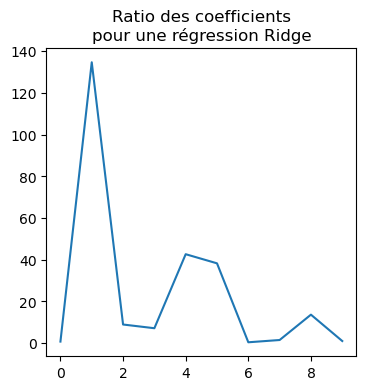

In [19]:
import matplotlib.pyplot as plt
r = numpy.abs(lin.coef_) / numpy.abs(rid.coef_)
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.plot(r)
ax.set_title("Ratio des coefficients\npour une régression Ridge");

## Régression Lasso
La régression Lasso minimise l'erreur :

$$E(\omega, \alpha) = \Vert X\cdot\omega - y \Vert_2^2 - \alpha\Vert\omega\Vert_2$$

C’est une régression linéaire avec une contrainte linéaire sur les coefficients. C’est utile lorsque les variables sont très corrélées, ce qui fausse souvent la résolution numérique. La solution ne s’exprime de façon exacte et la résolution utilise une méthode à base de gradient.

In [20]:
from sklearn.linear_model import Lasso
las = Lasso(5.).fit(X_train, y_train)
las.coef_

array([ 0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.])

On voit que beaucoup de coefficients sont nuls.

In [21]:
las.coef_ == 0

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [22]:
sum(las.coef_ == 0)

10

Comme pour la régression Ridge, il est préférable de normaliser. On étudie également le nombre de coefficients nuls en fonction de la valeur $\alpha$.

In [23]:
from tqdm import tqdm
res = []
for alf in tqdm([0.00001, 0.0001, 0.005, 0.01, 0.015,
                 0.02, 0.025, 0.03, 0.04, 0.05, 0.06,
                 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4]):
    las = Lasso(alf).fit(X_train, y_train)
    r2 = r2_score(y_test, las.predict(X_test))
    res.append({'lambda': alf, 'r2': r2,
                'nbnull': sum(las.coef_ == 0)})


from pandas import DataFrame
df = DataFrame(res)
df.head(5)

100%|██████████| 18/18 [00:00<00:00, 1354.38it/s]


,lambda,r2,nbnull
0,0.00001,0.528305,0
1,0.00010,0.528261,0
2,0.00500,0.526800,0
3,0.01000,0.524982,1
4,0.01500,0.524078,2


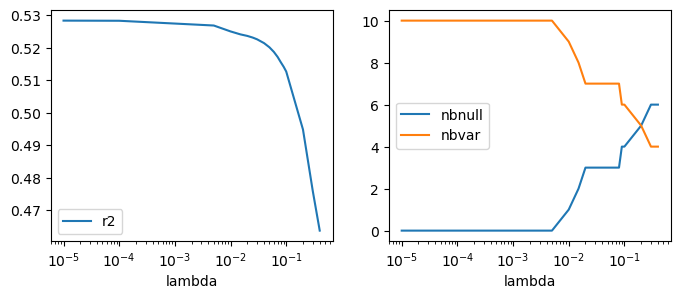

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))
ax[0].plot(df['lambda'], df['r2'], label='r2')
ax[1].plot(df['lambda'], df['nbnull'], label="nbnull")
ax[1].plot(df['lambda'], las.coef_.shape[0] - df['nbnull'], label="nbvar")
ax[0].set_xscale('log'); ax[1].set_xscale('log')
ax[0].set_xlabel("lambda"); ax[1].set_xlabel("lambda")
ax[0].legend(); ax[1].legend();